## Linear Regression Model

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [2]:
# Setup device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device {device} ")

Using device cuda 


In [3]:
# Create data using the linear regression formula Y = wieght*X + bias
wieght = .7
bias = .3

#Create range values
start = 0
end = 1
step = .02
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = wieght * X + bias
X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [4]:
# Split data
train_split = int(.8*len(X))
X_train, y_train = X[:train_split],y[:train_split]
X_test, y_test = X[train_split:],y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [5]:
# Create a linear model by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    # Use nn.Linear() for creating model parameters, creates a Linear set of data with one in number to 1 out number
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)

    #x: torch.Tensor)-> torch.Tensor saying x should be a Tensor and it should output a tensor
  def forward(self, x: torch.Tensor)-> torch.Tensor:
    return self.linear_layer(x)

torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [6]:
# Set model to use target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

In [7]:
#Setup loss function
loss_fn = nn.L1Loss() #same as MAE

#Setup our optimizer
optimizer = torch.optim.SGD(params = model_1.parameters(),
                            lr=.01)

In [8]:
# Training loop
torch.manual_seed(42)

epochs = 200

# Putting data on target device
X_test,X_train,y_test,y_train = X_test.to(device),X_train.to(device),y_test.to(device),y_train.to(device)


for epoch in range(epochs):
  model_1.train()

  #Forward Pass
  y_pred = model_1(X_train)

  #Calculate loss
  loss = loss_fn(y_pred, y_train)

  #Reset Optimizer to 0
  optimizer.zero_grad()

  # Perform backpropagation
  loss.backward()

  # Optimizer step
  optimizer.step()

  ### Testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)

    test_loss = loss_fn(test_pred, y_test)

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss; {test_loss}")

Epoch: 0 | Loss: 0.5551779866218567 | Test loss; 0.5739762187004089
Epoch: 10 | Loss: 0.439968079328537 | Test loss; 0.4392664134502411
Epoch: 20 | Loss: 0.3247582018375397 | Test loss; 0.30455657839775085
Epoch: 30 | Loss: 0.20954833924770355 | Test loss; 0.16984669864177704
Epoch: 40 | Loss: 0.09433845430612564 | Test loss; 0.03513690456748009
Epoch: 50 | Loss: 0.023886388167738914 | Test loss; 0.04784907028079033
Epoch: 60 | Loss: 0.019956795498728752 | Test loss; 0.045803118497133255
Epoch: 70 | Loss: 0.016517987474799156 | Test loss; 0.037530567497015
Epoch: 80 | Loss: 0.013089174404740334 | Test loss; 0.02994490973651409
Epoch: 90 | Loss: 0.009653178043663502 | Test loss; 0.02167237363755703
Epoch: 100 | Loss: 0.006215683650225401 | Test loss; 0.014086711220443249
Epoch: 110 | Loss: 0.00278724217787385 | Test loss; 0.005814164876937866
Epoch: 120 | Loss: 0.0012645035749301314 | Test loss; 0.013801801018416882
Epoch: 130 | Loss: 0.0012645035749301314 | Test loss; 0.013801801018416

In [9]:
with torch.inference_mode():
  y_preds = model_1(X_test)

In [10]:
def plot_predictions(train_data,
                     train_labels,
                     test_data,
                     test_labels,
                     predictions=None):
  """
  Plots training data, test data and compares predictions
  """
  plt.figure(figsize=(10,7))

  #Plot training data in blue
  plt.scatter(train_data, train_labels, c='b', s=4, label="Training Data" )

  #Plot test data in green
  plt.scatter(test_data, test_labels, c='g', s=4, label="Testing Data" )

  #Are there predictions?
  if predictions is not None:
    #Plot the predictions if they exist
    plt.scatter(test_data, predictions, c ='r', s=4, label='Predictions')

  #Show the legend
  plt.legend(prop={'size':14})

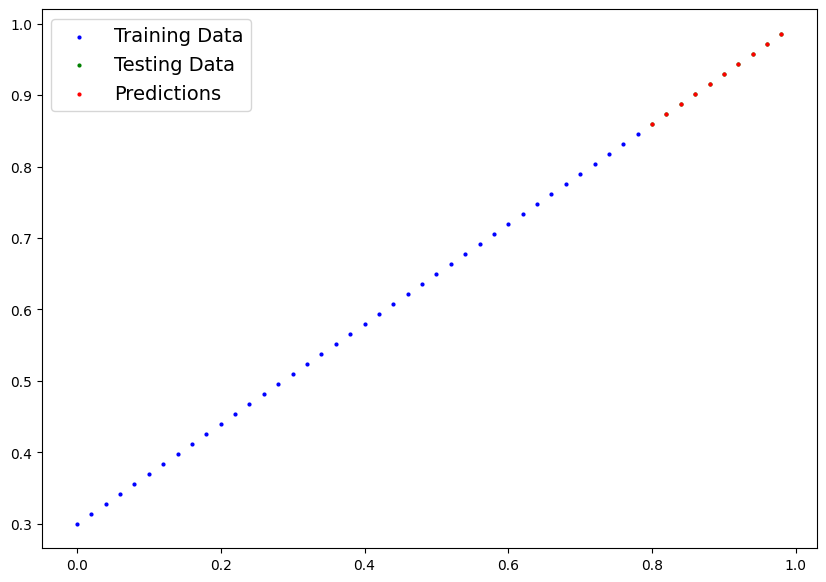

In [12]:
plot_predictions(X_train.cpu(), y_train.cpu(), X_test.cpu(), y_test.cpu(), predictions= y_preds.cpu())